#### Sebelum Kita melakukan pengolahan pada data ini maka ada hal-hal yang harus kita lakukan yaitu menentukan data yang kita miliki ini mau diapakan, maka sebelum itu biasanya kita memiliki beberapa pertanyaan yang terlintas sebagai dugaan awal dan pertanyaan-pertanyaan yang nantinya akan terjawab saat kita sudah mulai memproses data beberapa pertanyaan yang saya miliki anatara lain:

##### 1.DataFrame ini membahas tentang apa?
##### 2.Terdapat berapa kolom dan berapa baris serta tipe datanya apa pada DataFrame ini ?
##### 3.Apakah datanya sudah bersih ?
##### 4.Kejahatan Apa yang sering terjadi?
##### 5.Apa saja yang termasuk kejahatan besar dan kejahatan ringan berikan Visualisasinya?
##### 6.Bagaimana Proporsi kejahatan setiap wilayahnya?
##### 7.Dalam Kurun waktu 2008 -2016 total kejahatan terbanyak terjadi pada kapan dan paling sedikit terjadi kapan berdasarkan tahun dan bulan?
##### 8.Total Kejahatan per Tahun ?
##### 9. Bagaimana dengan Total Kejahatan per Tahun dan Kategori Kejahatan Berat/Ringan ?
##### 10.jumlah kejahatan berdasarkan borough dan Kejahatan Berat/Ringan ?
##### 11.Bagaimana Total Kejahatan per Borough dan Year?
##### 12.Tampilkan Visualisasi boxplot berdasarkan data bulan dan tahun/Tahun dan bulan/bulan dan value
##### 13.Bagimana Visualisasi Scatter Plot Jumlah Kejahatan per Tahun?
##### 14.Tampilan World CLOUD dan Peta London

 ### Import modul yang diperlukan
 
 Pada setiap kasus sebelum kita memproses ke tahap selanjutnya maka harus mengimport/install modul akan dipakai akan mempermudah

In [1]:
# Ini adalah modul yang akan dipakai 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import geojson as gj
import plotly.express as px
import json
import urllib.request
import requests
from urllib.request import urlopen
from IPython.display import display
from PIL import Image
from wordcloud import WordCloud

## Memanggil dataFrame

Setelah mengimport/install modul maka kita akan memanggil data frame yang akan kita gunakan pada kasus ini menggunakan data frame dari data kejahatan yang terjadi di London periode 2008-2016

In [2]:
# memanggil data frame 

df = pd.read_csv('london_crime_by_lsoa.csv')

Memanggil 10 data awal pada data Frame

In [3]:
df.head(10)

lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   
5  E01001320      Ealing           Theft and Handling   
6  E01001342      Ealing  Violence Against the Person   
7  E01002633    Hounslow                      Robbery   
8  E01003496      Newham              Criminal Damage   
9  E01004177      Sutton           Theft and Handling   

                      minor_category  value  year  month  
0        Burglary in Other Buildings      0  2016     11  
1                     Other violence      0  2016     11  
2                     Other violence      0  2015      5  
3        Burglary in Other Buildings      0  2016      3  
4                  Personal Property      0  2008      6  
5                        Other Theft      0  2012      5  
6                   Offensive Weapon      0  2010      7  
7                  Personal Property      0  2013      4  
8  Criminal Damage To Other Building      0  2013      9  
9        Theft/Taking of Pedal Cycle      1  2016      8

Menampilkan 5 baris pertama dari dataset 

In [4]:
print("Tampilkan lima baris pertama dari dataset")
print(df.head())

Tampilkan lima baris pertama dari dataset
   lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6  


Kita mencoba untuk melihat info apa saja yang terdapat pada dataframe 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


### Pada tahap ini mulai kita melakukan proses pembersihan yaitu hal yang dilakukan melihat terlebih dahulu apakah data frame yang kita gunakan terdapat null/kotor jika tidak bisa langsung di mulai proses selanjutnya.

In [6]:
# Melihat jumlah total missing

df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Berdasarkan info isnull di atas data frame ini sudah bersih jadi langsung ke Proses Selanjutnya 

In [7]:
print("menampilkan nilai-nilai kolom ")
df1=df.head(10)
df1.columns.values

menampilkan nilai-nilai kolom 


array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

<Axes: >

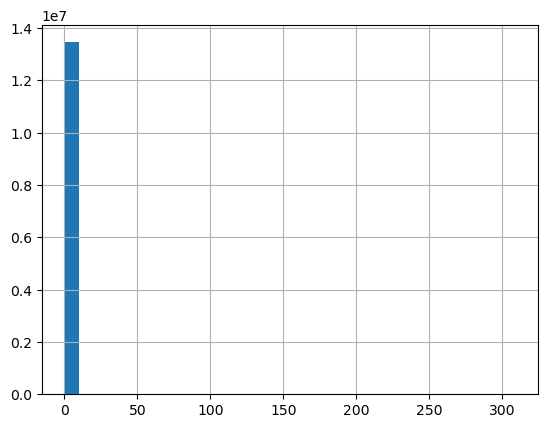

In [8]:
df.value.hist( bins = 30)

In [9]:
df.shape

(13490604, 7)

In [10]:
# Menghitung berapa kali setiap nilai (value) yang ada dalam kolom 'value' muncul dalam DataFrame 

df.value.value_counts()

0      10071505
1       2141789
2        712478
3        275501
4        119483
         ...   
216           1
151           1
243           1
188           1
218           1
Name: value, Length: 247, dtype: int64

### Membuat grafik batang (bar chart) yang menunjukkan jumlah kemunculan setiap kategori utama (major_category) dalam kolom 'KEJAHATAN_BESAR' 

<Axes: >

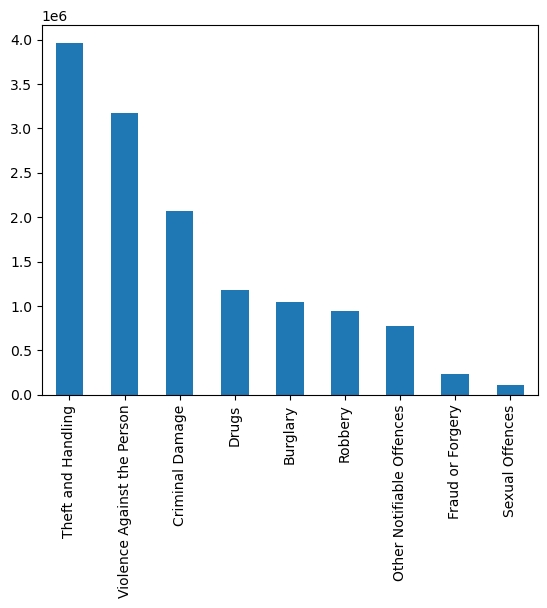

In [11]:
df.major_category.value_counts().plot.bar()

Pada kasus ini dalam kurun waktu 2008-2016 kejatan besar yang paling sering terjadi adalah Theft and Handling sedangkan yang paling sedikit terjadi untuk kejahatan besar adalah sexual offences.

### Membuat grafik batang (bar chart) yang menunjukkan jumlah kemunculan setiap kategori utama (minor_category) dalam kolom 'KEJAHATAN_Ringan' 

<Axes: >

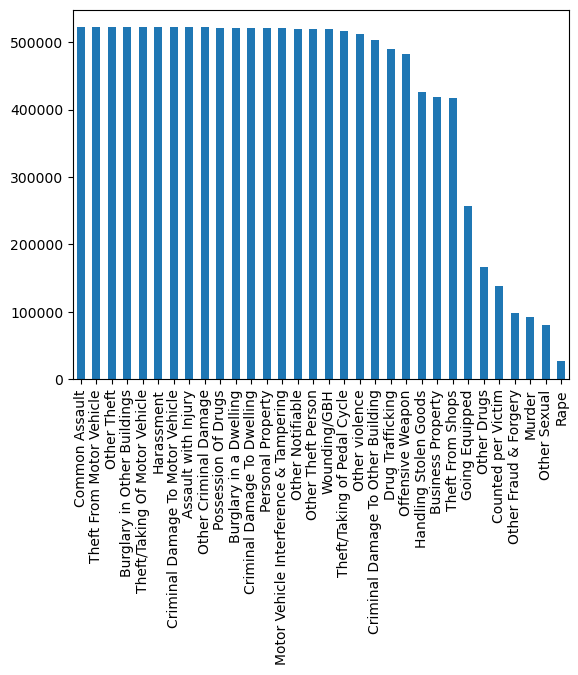

In [12]:
df.minor_category.value_counts().plot.bar()

Pada kasus ini untuk kategori kejahatan ringan yang pertama pada kejahatan common assault sedangkan yang paling jarang adalah kategori Rape.

# Membuat Visualisasi dengan diagram lingkaran untuk kategori kejahatan Berat

In [13]:
# Hitung jumlah kejahatan berdasarkan major_category
c1 = df.groupby('major_category')['value'].sum().reset_index()

# Buat plot diagram lingkaran penuh dengan Plotly Express
fig = px.pie(c1, values='value', names='major_category',
             title='Total Kejahatan Menurut Kejahatan Berat',
             labels={'major_category': 'Major Category'})

# Menampilkan plot interaktif
fig.show()

Berdasarkan kategori kejahatan besar Total Kejahatan Menurut Kejahatan Besar di wilayah London dalam kurun waktu 2008-2016 adalah yang paling mendominasi adalah jenis kejahatan Theft and Handling dengan presentase 41.2 %.

In [14]:
# Hitung jumlah kejahatan berdasarkan major_category
c11 = df.groupby('major_category')['value'].sum().reset_index()

# Buat plot diagram pie dengan Plotly Express
fig = px.pie(c1, values='value', names='major_category',
             title='Total Kejahatan Menurut Kejahatan berat',
             labels={'major_category': 'Major Category'},
             hole=0.5)

# Menampilkan plot interaktif
fig.show()

Berdasarkan kategori kejahatan besar Total Kejahatan Menurut Kejahatan Besar di wilayah London dalam kurun waktu 2008-2016 adalah yang paling mendominasi adalah jenis kejahatan Theft and Handling dengan presentase 41.2 %.

## Membuat Visualisasi dengan diagram lingkaran untuk kategori kejahatan Ringan

In [15]:
# Hitung jumlah kejahatan berdasarkan major_category
c1a = df.groupby('minor_category')['value'].sum().reset_index()

# Buat plot diagram lingkaran penuh dengan Plotly Express
fig_pie = px.pie(c1a, values='value', names='minor_category',
                 title='Total Kejahatan Menurut Kejahatan ringan',
                 labels={'minor_category': 'minor_category'})

# Menampilkan plot interaktif
fig_pie.show()

Berdasarkan kategori kejahatan ringan, Total Kejahatan Menurut Kejahatan Ringan di wilayah London dalam kurun waktu 2008-2016 adalah yang paling rendah adalah jenis kejahatan Rape dengan presentase 0.00146 %.

In [16]:
# Menghitung jumlah kejahatan berdasarkan major_category
c111 = df.groupby('minor_category')['value'].sum().reset_index()

# Buat plot diagram pie dengan Plotly Express
figs = px.pie(c111, values='value', names='minor_category',
             title='Total Kejahatan Menurut Kejahatan ringan',
             labels={'minor_category': 'minor_category'},
             hole=0.5)

# Menampilkan plot interaktif
figs.show()

Berdasarkan kategori kejahatan ringan, Total Kejahatan Menurut Kejahatan Ringan di wilayah London dalam kurun waktu 2008-2016 adalah yang paling rendah adalah jenis kejahatan Rape dengan presentase 0.00146 %.

# Kejahatan Berdasarkan Wilayah

## Proporsi Kejahatan Berdasarkan Wilayah Secara Umum

In [17]:
# Kelompokkan data berdasarkan kolom 'borough' dan hitung jumlah kejahatan
total_crimes_by_borough = df.groupby('borough')['value'].sum().reset_index()

# Buat diagram lingkaran dengan Plotly Express
fig = px.pie(total_crimes_by_borough, values='value', names='borough', 
             title='Proporsi Jumlah Kejahatan di Berbagai Wilayah')

# Tampilkan diagram lingkaran
fig.show()

Ini adalah Gambaran persebaran presentase kejahatan yang terjadi di london dalam rentan waktu 2008-2016 berdasarkan wilayah

## 5 wilayah paling rawan kejahatan

In [18]:
# Kelompokkan data berdasarkan kolom 'borough' dan hitung jumlah kejahatan
total_crimes_by_borough = df.groupby('borough')['value'].sum()

# Mengurutkan wilayah berdasarkan jumlah kejahatan
wilayah_teratas = total_crimes_by_borough.sort_values(ascending=False).head(5)

# Buat diagram lingkaran dengan Plotly Express
fig = px.pie(wilayah_teratas, values=wilayah_teratas, names=wilayah_teratas.index, 
             title='5 Wilayah Paling Rawan Kejahatan')

# Tampilkan diagram lingkaran
fig.show()

# Kelompokkan data berdasarkan kolom 'borough' dan hitung jumlah kejahatan
total_crimes_by_borough = df.groupby('borough')['value'].sum()

# Mengurutkan wilayah berdasarkan jumlah kejahatan (dari yang tertinggi)
wilayah_rawan_kejahatan = total_crimes_by_borough.sort_values(ascending=False).head(5)

print("5 wilayah paling rawan kejahatan:")
print(wilayah_rawan_kejahatan)

5 wilayah paling rawan kejahatan:
borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Name: value, dtype: int64


Berdasarkan daerah inilah 5 kota di London yang memiliki kerentanan kejahatan rentan waktu 2008-2016 anatar lain Wastminster,lambeth, Southwark, Camden dan Newham.

## 5 Wilayah paling aman dari kejahatan

In [19]:
# Kelompokkan data berdasarkan kolom 'borough' dan hitung jumlah kejahatan
total_crimes_by_borough = df.groupby('borough')['value'].sum()

# Mengurutkan wilayah berdasarkan jumlah kejahatan (dari yang paling rendah)
wilayah_paling_aman = total_crimes_by_borough.sort_values(ascending=True).head(5)

# Buat diagram lingkaran dengan Plotly Express
fig = px.pie(wilayah_paling_aman, values=wilayah_paling_aman, names=wilayah_paling_aman.index, 
             title='5 Wilayah Paling Aman dari Kejahatan')

# Tampilkan diagram lingkaran
fig.show()

# Kelompokkan data berdasarkan kolom 'borough' dan hitung jumlah kejahatan
total_crimes_by_borough = df.groupby('borough')['value'].sum()

# Mengurutkan wilayah berdasarkan jumlah kejahatan (dari yang paling rendah)
wilayah_paling_aman = total_crimes_by_borough.sort_values(ascending=True).head(5)

print("Wilayah paling aman dari kejahatan:")
print(wilayah_paling_aman)

Wilayah paling aman dari kejahatan:
borough
City of London             780
Kingston upon Thames     89306
Richmond upon Thames     96771
Sutton                  100987
Bexley                  114136
Name: value, dtype: int64


Berdasarkan daerah inilah 5 kota di London yang paling aman dari kejahatan rentan waktu 2008-2016 anatar lain City of London, Kingston upon Thames, Richmond upon Thames, Sutton dan Bexley.
Perlu diketahui,Bahwa Wilayah yang paling aman bukan berarti wilayah tersebut tidak memiliki kejahatan yang terjadi melainkan tingay kejadian kejahatan yang paling sedikti terjadi.

# Membuat Visualisasi Total Kejahatan pertahun dan Bulan 

In [20]:
# Menghitung jumlah kejahatan berdasarkan 'month' dan 'year'
c3 = df.groupby(['month', 'year'])['value'].sum().reset_index()

# Membuat kolom 'date' dengan format 'year/month'
c3['date'] = c3['year'].astype(str) + '/' + c3['month'].astype(str)

# Membuat plot garis interaktif dengan Plotly Express
fig = px.line(c3, x='date', y='value', title='Total Kejahatan per Tahun dan Bulan', labels={'date': 'Tanggal (Year/Month)', 'value': 'Total Kejahatan'})

# Menyusun ulang label sumbu x agar lebih terbaca
fig.update_xaxes(tickangle=45, tickformat='%Y/%m')

# Menampilkan plot
fig.show()

Dalam Kurun waktu 2008 -2016 total kejahatan terbanyak terjadi pada maret 2012 dengan total kejahatan 67.537k dan paling rendah pada Februari 2014 dengan total kejahatan 51.222k

## Total Kejahatan pertahun dan kategori utama kejahatan besar / Major_kategory

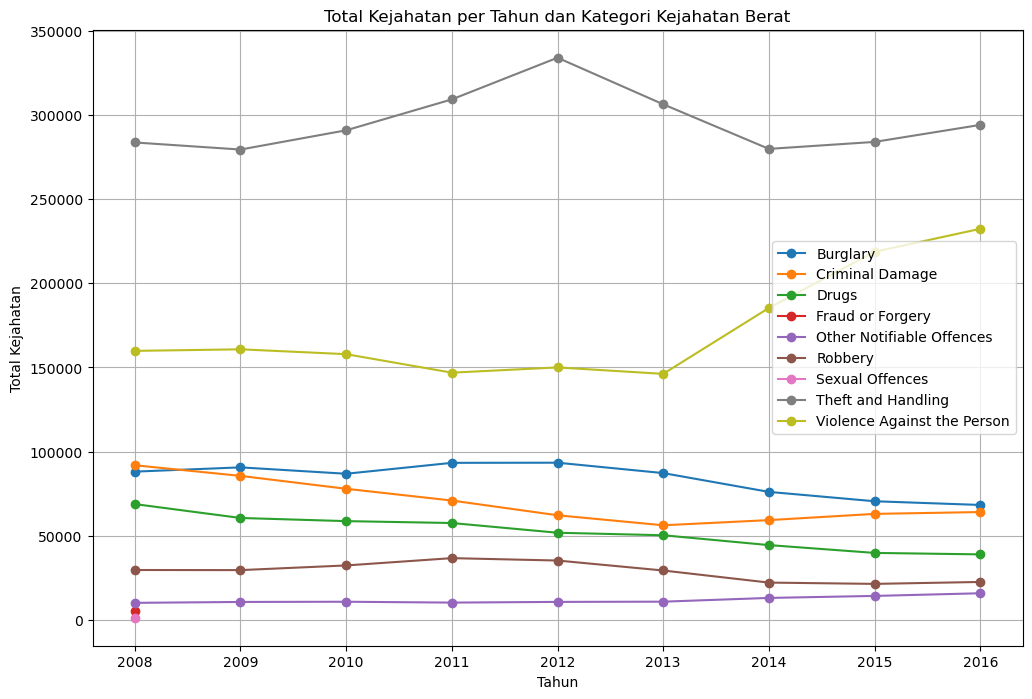

In [21]:
# Filter data
filtered_crime = df[df['value'] > 0]

# Menghitung jumlah kejahatan berdasarkan 'major_category' dan 'year'
c2 = filtered_crime.groupby(['major_category', 'year'])['value'].sum().reset_index()
c2 = c2.sort_values(by=['major_category', 'year'])

# Membuat plot dengan Matplotlib
plt.figure(figsize=(12, 8))
for category, data in c2.groupby('major_category'):
    plt.plot(data['year'], data['value'], marker='o', linestyle='-', label=category)

plt.xlabel('Tahun')
plt.ylabel('Total Kejahatan')
plt.title('Total Kejahatan per Tahun dan Kategori Kejahatan Berat')
plt.legend()
plt.grid(True)

# Menggabungkan dengan plot interaktif Plotly Express
fig = px.line(c2, x='year', y='value', color='major_category',
              labels={'year': 'Tahun', 'value': 'Total Kejahatan'},
              title='Total Kejahatan per Tahun dan Kategori Kejahatan Berat')

# Menampilkan kedua plot
plt.show()
fig.show()

Berdasarkan kejahatan berat dapat dilihat pada visualisasi ini bahwa jenis kejahatan Theft and Handling ini memiliki grafik yang paling tinggi dan puncak kejahatan tertingginya pada tahun 2012 dengan total kejahatan 334.054k

## Total Kejahatan pertahun dan kategori utama kejahatan ringan / Minor_kategory

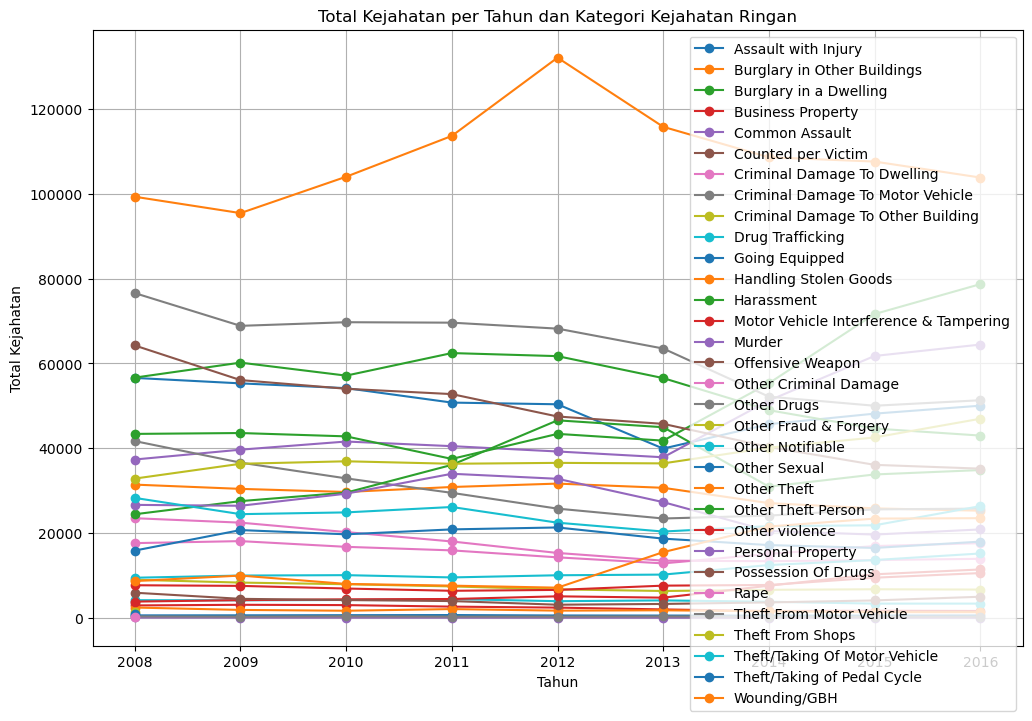

In [22]:
# Filter data
filtered_crime1 = df[df['value'] > 0]

# Menghitung jumlah kejahatan berdasarkan 'minor_category' dan 'year'
c21 = filtered_crime1.groupby(['minor_category', 'year'])['value'].sum().reset_index()
c21 = c21.sort_values(by=['minor_category', 'year'])

# Membuat plot dengan Matplotlib
plt.figure(figsize=(12, 8))
for category, data in c21.groupby('minor_category'):
    plt.plot(data['year'], data['value'], marker='o', linestyle='-', label=category)

plt.xlabel('Tahun')
plt.ylabel('Total Kejahatan')
plt.title('Total Kejahatan per Tahun dan Kategori Kejahatan Ringan')
plt.legend()
plt.grid(True)

# Menggabungkan dengan plot interaktif Plotly Express
fig = px.line(c21, x='year', y='value', color='minor_category',
              labels={'year': 'Tahun', 'value': 'Total Kejahatan'},
              title='Total Kejahatan per Tahun dan Kategori Kejahatan Ringan')

# Menampilkan kedua plot
plt.show()
fig.show()

Berdasarkan kejahatan Ringan dapat dilihat pada visualisasi ini bahwa jenis kejahatan Wounding/GBH ini memiliki grafik yang paling rendah relatif.

# Total Kejahatan per Tahun

In [23]:
# Menghitung jumlah kejahatan berdasarkan tahun
kejahatan = df.groupby('year')['value'].sum().reset_index()
kejahatan = kejahatan.sort_values(by='year')

# Membuat plot interaktif dengan Plotly Express
fig = px.line(kejahatan, x='year', y='value',
              labels={'year': 'Tahun', 'value': 'Total Kejahatan'},
              title='Total Kejahatan per Tahun')

# Menampilkan plot interaktif
fig.show()

Berdasarkan total kejahatan pertahun yang terjadi di London pada kurun waktu 2008-2016 dengan kategori kejahatan berat terjadi pada tahun 2008 dengan total kejahatan 738.641k sedangkan paling rendah pada tahun 2014 dengan Total kejahatan 680.183k.

# Total Kejahatan per Bulan dan Tahun

In [24]:
# Menghitung jumlah kejahatan per bulan dan tahun
c3 = df.groupby(['month', 'year'])['value'].sum().reset_index()

# Buat grafik garis dengan Plotly Express
fig = px.line(
    c3, 
    x='month', 
    y='value', 
    color='year', 
    markers=True, 
    title='Total Kejahatan per Bulan dan Tahun'
)

# Tambahkan label sumbu
fig.update_layout(
    xaxis_title='Bulan',
    yaxis_title='Jumlah Kejahatan'
)

# Tampilkan grafik
fig.show()

Ini adalah grafik total kejahatan yang terjadi berdasarkan bulan dan tahun 

# Visualisasi dengan area Plot

In [25]:
# Menghitung jumlah kejahatan per bulan dan tahun
c3 = df.groupby(['month', 'year'])['value'].sum().reset_index()

# Buat area plot dengan Plotly Express
fig = px.area(
    c3, 
    x='month', 
    y='value', 
    color='year', 
    title='Total Kejahatan per Bulan dan Tahun',
    labels={'month': 'Bulan', 'value': 'Jumlah Kejahatan', 'year': 'Tahun'}
)

# Tampilkan grafik
fig.show()

Ini adalah grafik total kejahatan yang terjadi berdasarkan bulan dan tahun dengan visualisasi area plot

# jumlah kejahatan berdasarkan borough dan major_category

In [26]:
# Filter data
filtered_data = df[df['value'] > 0]

# Hitung jumlah kejahatan berdasarkan borough dan major_category
c5 = filtered_data.groupby(['borough', 'major_category'])['value'].sum().reset_index()
c5 = c5.sort_values(by='value')

# Membuat plotly express plot
fig = px.bar(c5, x='borough', y='value', color='major_category',
             title='Total Kejahatan per Borough dan Major Category',
             labels={'value': 'Total Kejahatan'})
             
fig.update_xaxes(categoryorder='total descending')  # Mengurutkan kategori berdasarkan total kejahatan secara descending

# Menampilkan plot
fig.show()

Visualisasi total kejahatan tiap daerah dengan kategori kejahatan besar 

# jumlah kejahatan berdasarkan borough dan minor_category

In [27]:
# Filter data
filtered_data1 = df[df['value'] > 0]

# Hitung jumlah kejahatan berdasarkan borough dan minor_category
c5a = filtered_data.groupby(['borough', 'minor_category'])['value'].sum().reset_index()
c5a = c5a.sort_values(by='value')

# Membuat plotly express plot
fig = px.bar(c5a, x='borough', y='value', color='minor_category',
             title='Total Kejahatan per Borough dan Minor Category',
             labels={'value': 'Total Kejahatan'})
             
fig.update_xaxes(categoryorder='total descending')  # Mengurutkan kategori berdasarkan total kejahatan secara descending

# Menampilkan plot
fig.show()

Visualisasi total kejahatan tiap daerah dengan kategori kejahatan Ringan

# Total Kejahatan per Borough dan Year

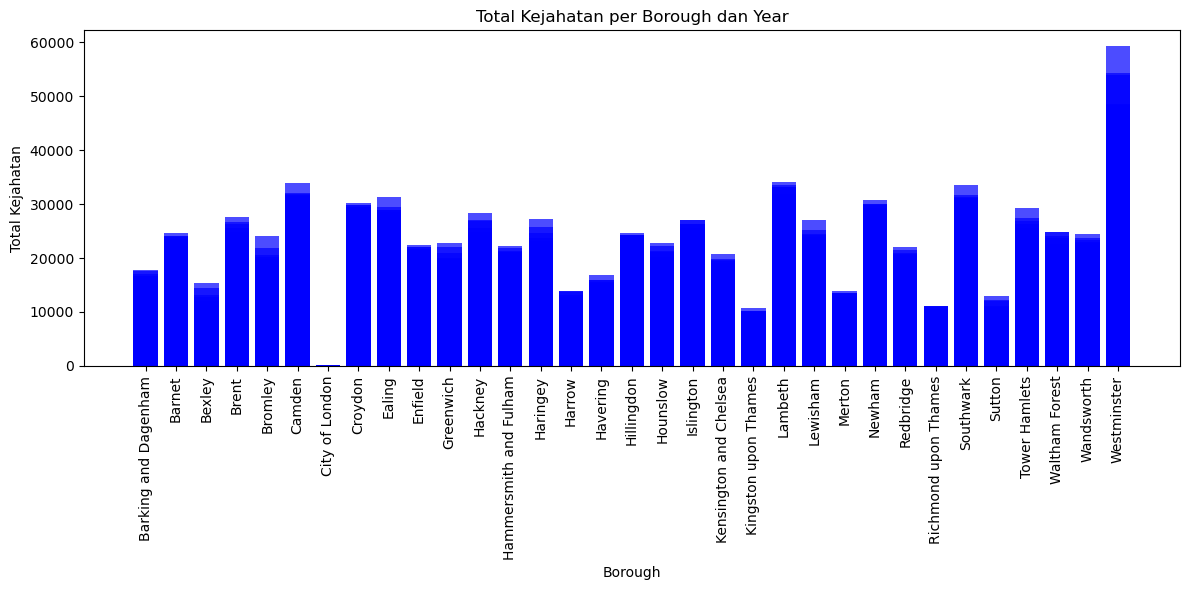

In [28]:
# Mengelompokkan data berdasarkan "borough" dan "year" serta menghitung total "value"
total_value_by_borough_year = df.groupby(['borough', 'year'])['value'].sum().reset_index()

# Membuat grafik batang
plt.figure(figsize=(12, 6))
plt.bar(total_value_by_borough_year['borough'], total_value_by_borough_year['value'], color='b', alpha=0.7)
plt.xlabel('Borough')
plt.ylabel('Total Kejahatan')
plt.title('Total Kejahatan per Borough dan Year')
plt.xticks(rotation=90)
plt.tight_layout()

# Menampilkan grafik batang
plt.show()

Visualisasi dengan diagram batang,Total kejahatan di daerah berdasarkan Tahun. 

## Visualisasi boxplot berdasarkan data bulan dan tahun

<Axes: title={'center': 'year'}, xlabel='month'>

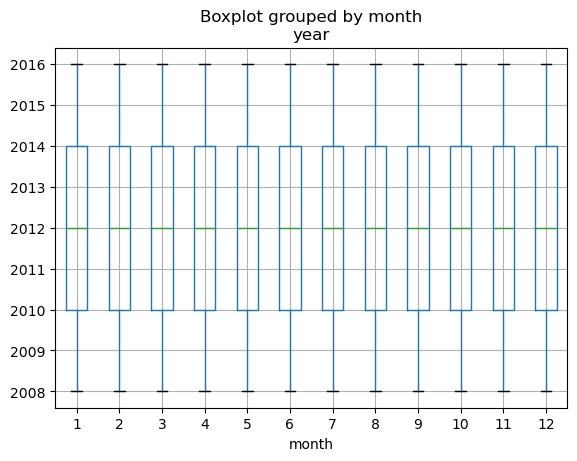

In [29]:
# mengelompokkan data berdasarkan bulan
df.boxplot(column=['year'], by='month')

Ini adalah hasil Visualisasi boxplot berdasarkan data bulan dan tahun.

## Visualisasi boxplot berdasarkan data Tahun dan bulan 

<Axes: title={'center': 'month'}, xlabel='year'>

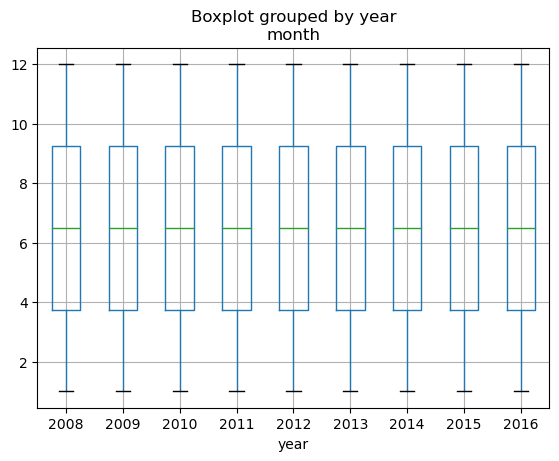

In [30]:
# mengelompokkan data berdasarkan bulan
df.boxplot(column=['month'], by='year')

Ini adalah Visualisasi boxplot berdasarkan data Tahun dan bulan

## Visualisasi boxplot berdasarkan data bulan dan value

<Axes: title={'center': 'value'}, xlabel='month'>

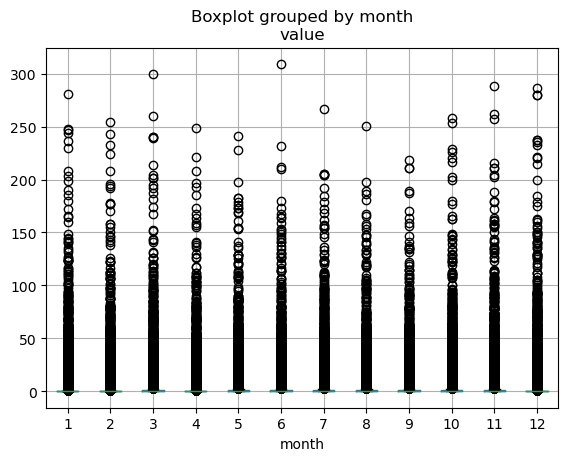

In [31]:
# mengelompokkan data berdasarkan bulan
df.boxplot(column=['value'], by='month')

Hasil Visualisasi boxplot berdasarkan data bulan dan value

# Visualisasi Scatter Plot

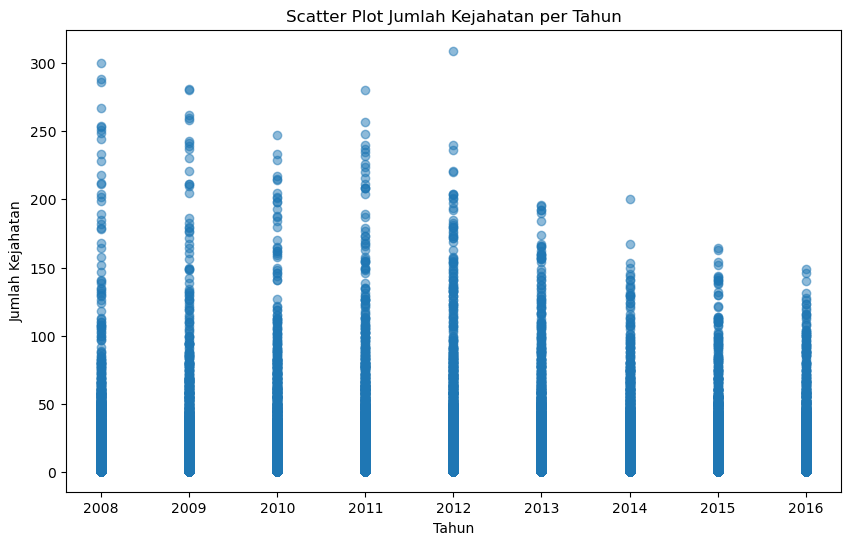

In [32]:
# Filter data jika diperlukan
filtered_data = df[df['value'] > 0]

# Pilih kolom yang akan digunakan sebagai sumbu x dan sumbu y
x = filtered_data['year']
y = filtered_data['value']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)  # alpha adalah tingkat transparansi titik

# Menambahkan label dan judul
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.title('Scatter Plot Jumlah Kejahatan per Tahun')

# Menampilkan plot
plt.show()

Hasil Scatter Plot Jumlah Kejahatan per Tahun

plot data sebagai titik titik berdasarkan Value

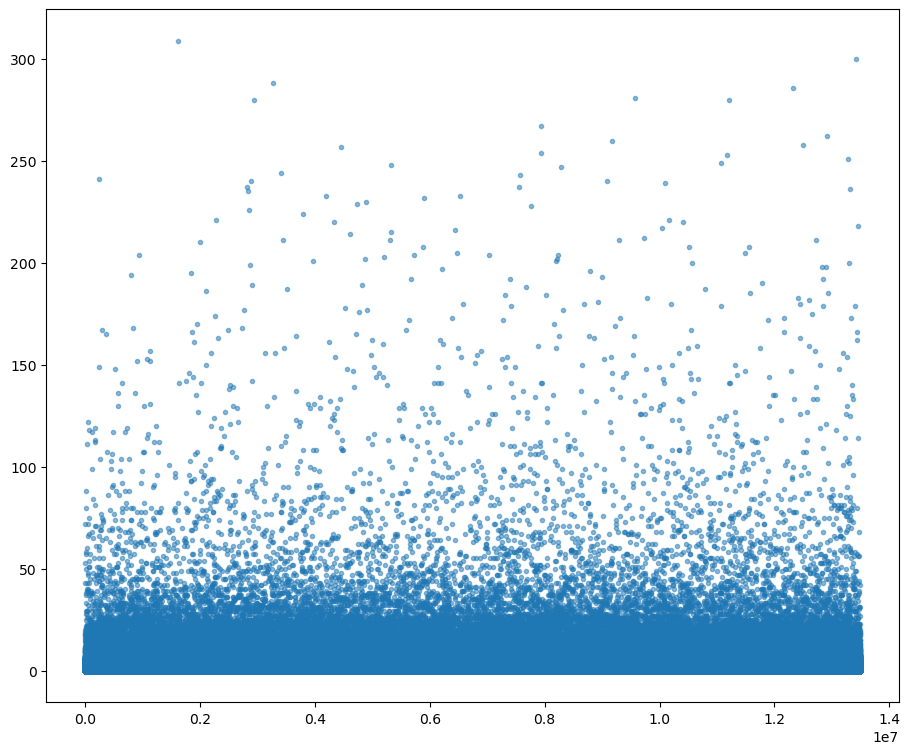

In [33]:
# plot data sebagai titik titik

df['value'].plot(marker='.', alpha=0.5, linestyle= 'None', figsize=(11,9));

Hasil Visualisasi plot data sebagai titik titik

# Word Clouds

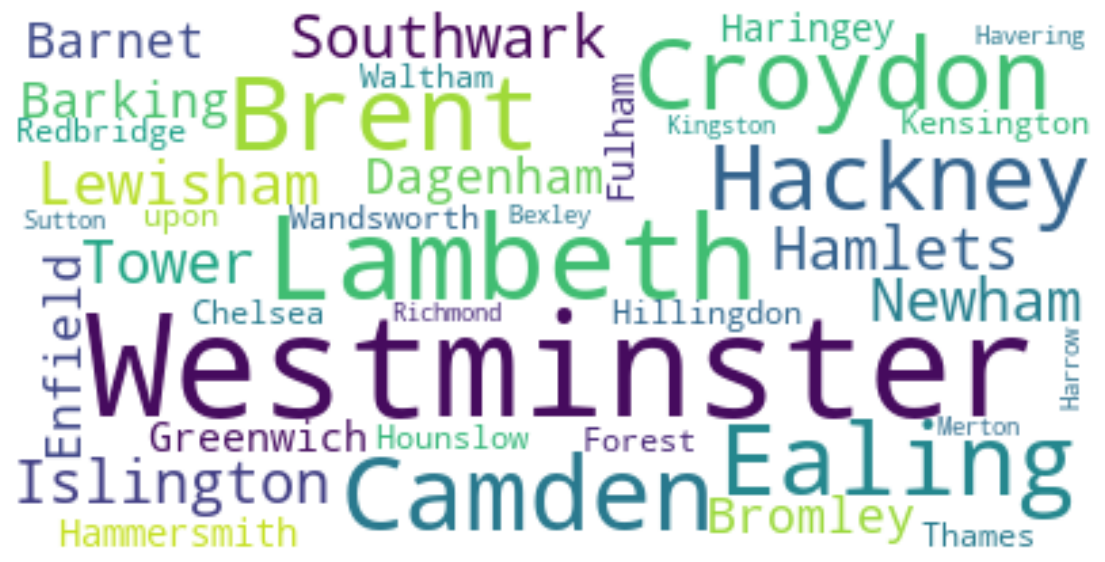

In [34]:
# Menghitung total kejahatan berdasarkan 'borough'
borough_total = df.groupby('borough')['value'].sum().reset_index()

# Membuat string kata
max_words = 90
word_string = ''

for borough in borough_total['borough']:
    repeat_num_times = int(borough_total.loc[borough_total['borough'] == borough, 'value'] / float(borough_total['value'].sum()) * max_words)
    word_string = word_string + ((borough + ' ') * repeat_num_times)

# Membuat word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

# Menampilkan word cloud
fig = plt.figure(figsize=(14, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Hasil pembuatan World CLOUD dengan acuan kolom borough

# Peta London

In [35]:
# Membuat objek peta dengan koordinat tengah
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# Menambahkan marker
folium.Marker([51.5074, -0.1278], tooltip='London').add_to(m)
folium.Marker([51.5174, -0.1378], tooltip='Marker 2').add_to(m)
folium.Marker([51.5274, -0.1478], tooltip='Marker 3').add_to(m)

# Menampilkan peta
m

Ini adalah hasil atau penampakan dari map london

# Kesimpulan

## Berdasarkan Pertanyaan di atas dan proses yang telah dilakukan untuk menjawab pertanyaan dan dugaan-dugaan sebelumnya maka dapat disimpulkan bahwa DataFrame yang berjudul london_crime_by_lsoa.csv merupakan:

#### 1.Data yang berisi tentang catatan kejahatan yang terjadi di London pada kurun Waktu 2008-2016 
#### 2.Dimana dalam data tersebut terdapat 7 kolom dan 13490604 baris
#### 3.Data pada DataFrame ini sudah bersih dan tidak terdapat Null
#### 4.Berdasarkan kategori kejahatan berat Theft and Handling adalah yang paling sering terjadi sedangkan yang paling sedikit terjadi untuk kejahatan berat adalah sexual offences.
#### 5.Berdasarkan kategori kejahatan ringan common assault adalah yang paling sering terjadi sedangkan yang paling jarang adalah kategori Rape.
#### 6.Berdasarkan kategori kejahatan besar Total Kejahatan Menurut Kejahatan Besar di wilayah London dalam kurun waktu 2008-2016 adalah yang paling mendominasi adalah jenis kejahatan Theft and Handling dengan presentase 41.2 %.
#### 7.Berdasarkan kategori kejahatan ringan, Total Kejahatan Menurut Kejahatan Ringan di wilayah London dalam kurun waktu 2008-2016 adalah yang paling rendah adalah jenis kejahatan Rape dengan presentase 0.00146 %.
#### 8.Berdasarkan daerah inilah 5 kota di London yang memiliki kerentanan kejahatan rentan waktu 2008-2016 anatar lain Wastminster,lambeth, Southwark, Camden dan Newham.
#### 9.Berdasarkan daerah inilah 5 kota di London yang paling aman dari kejahatan rentan waktu 2008-2016 anatar lain City of London, Kingston upon Thames, Richmond upon Thames, Sutton dan Bexley.Perlu diketahui,Bahwa Wilayah yang paling aman bukan berarti wilayah tersebut tidak memiliki kejahatan yang terjadi melainkan tingay kejadian kejahatan yang paling sedikti terjadi.
#### 10.Dalam Kurun waktu 2008 -2016 total kejahatan terbanyak terjadi pada maret 2012 dengan total kejahatan 67.537k dan paling rendah pada Februari 2014 dengan total kejahatan 51.222k
#### 11.Berdasarkan kejahatan berat dapat dilihat pada visualisasi ini bahwa jenis kejahatan Theft and Handling ini memiliki grafik yang paling tinggi dan puncak kejahatan tertingginya pada tahun 2012 dengan total kejahatan 334.054k
#### 12.Berdasarkan kejahatan Ringan dapat dilihat pada visualisasi ini bahwa jenis kejahatan Wounding/GBH ini memiliki grafik yang paling rendah relatif.
#### 13.Berdasarkan total kejahatan pertahun yang terjadi di London pada kurun waktu 2008-2016 dengan kategori kejahatan berat terjadi pada tahun 2008 dengan total kejahatan 738.641k sedangkan paling rendah pada tahun 2014 dengan Total kejahatan 680.183k.
#### 14.Pada bagian Visualisasi Word Clouds saya menggunakan data dari kolom borough
#### 15.Visualisasi yang saya gunakan antara lain Area Plot, Histogram, BarChart, Pie Chart, Box Plot, Scatter Plot, Word Clouds,Folium Maps ,Line, dan Processing.